In [78]:
# example: here ,using lung_dfs_cis as input , can use any other file in its place like lung_dfs_car or brca_dfs_pac



import warnings
warnings.filterwarnings("ignore")
#ignore warnings
import pandas as pd

lung_dfs_cis=pd.read_csv('/Users/priyamvadakumar/Desktop/research/data/lung_dfs_cis.csv')

print(lung_dfs_cis)





    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [79]:
num_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes != 'object']
cat_vars= lung_dfs_cis.columns[lung_dfs_cis.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['status', 'months', 'lg_clone_snv', 'lg_clone_cnv', 'branch_mean',
       'branch_max', 'branch_var', 'height', 'cnv_rate', 'snv_rate',
       ...
       'race', 'pathologic_stage|stage ia', 'pathologic_stage|stage ib',
       'pathologic_stage|stage iia', 'pathologic_stage|stage iib',
       'pathologic_stage|stage iiia', 'anatomic_neoplasm_subdivision|l-upper',
       'anatomic_neoplasm_subdivision|r-upper',
       'anatomic_neoplasm_subdivision|l-lower',
       'anatomic_neoplasm_subdivision|r-lower'],
      dtype='object', length=131)
Index(['measure_of_response'], dtype='object')


In [80]:
responses=lung_dfs_cis['measure_of_response'].unique()
print(responses)
print(lung_dfs_cis['measure_of_response'].value_counts())

['Complete Response' 'Partial Response' 'Stable Disease'
 'Clinical Progressive Disease']
Complete Response               31
Clinical Progressive Disease     5
Stable Disease                   4
Partial Response                 1
Name: measure_of_response, dtype: int64


In [81]:
# filter measure of response to binary 


check= lung_dfs_cis["measure_of_response"].replace(['Clinical Progressive Disease','Stable Disease','Partial Response'],'Incomplete Response')
print(check)




responses=check.unique()
print(responses)
print(check.value_counts())

0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [82]:
# make new datset with dropped original reponses col- making datasets

lung_dfs_cis_datasets = lung_dfs_cis.drop(columns=['measure_of_response'])

In [83]:
# add new response to new dataset 


#brca_dfs_cyclo_dataset = brca_dfs_cyclo_datasets
lung_dfs_cis_datasets['Response']=check


print(lung_dfs_cis_datasets)

respon=lung_dfs_cis_datasets['Response'].unique()
print(respon)
print(lung_dfs_cis_datasets['Response'].value_counts())



    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [84]:
# encoding reposnse variable 
import numpy as np
from sklearn.preprocessing import LabelEncoder
y=lung_dfs_cis_datasets['Response']
print(y)
y=LabelEncoder().fit_transform(y)
print(y)
print(np.unique(y))



0       Complete Response
1       Complete Response
2       Complete Response
3     Incomplete Response
4       Complete Response
5       Complete Response
6     Incomplete Response
7     Incomplete Response
8     Incomplete Response
9       Complete Response
10      Complete Response
11      Complete Response
12      Complete Response
13      Complete Response
14      Complete Response
15      Complete Response
16      Complete Response
17      Complete Response
18      Complete Response
19      Complete Response
20    Incomplete Response
21      Complete Response
22      Complete Response
23      Complete Response
24      Complete Response
25      Complete Response
26      Complete Response
27      Complete Response
28    Incomplete Response
29      Complete Response
30    Incomplete Response
31      Complete Response
32      Complete Response
33      Complete Response
34      Complete Response
35    Incomplete Response
36    Incomplete Response
37    Incomplete Response
38      Comp

In [85]:
#insert response column
lung_dfs_cis_datasets['Response']=y
print(lung_dfs_cis_datasets['Response'])

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
30    1
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    0
39    0
40    0
Name: Response, dtype: int64


In [86]:
print(lung_dfs_cis_datasets)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [87]:
# word featutres is used for features in the dataframe format and X is used for features in numpy format
# only features
features=lung_dfs_cis_datasets.iloc[:, :-1]
print(features)
print(features.shape)

    status     months  lg_clone_snv  lg_clone_cnv  branch_mean  branch_max  \
0        0  18.562994      0.955105      0.735709     0.972369    0.974097   
1        1  12.977669      0.710492      0.586714     0.703805    0.704855   
2        1  26.119611      0.599377      0.598280     0.617707    0.613024   
3        1   6.406697      0.648159      0.505391     0.631109    0.624544   
4        0   7.359488      0.719031      0.691232     0.750760    0.748603   
5        1  11.203506      0.201091      0.334206     0.185599    0.176366   
6        1  17.610203      0.243362      0.405381     0.265587    0.255929   
7        1   6.012439      0.395449      0.191770     0.325852    0.318929   
8        1   6.012439      0.395449      0.191770     0.325852    0.318929   
9        1  27.893774      0.425459      0.458397     0.425125    0.412624   
10       1   6.538117      0.354086      0.515658     0.408655    0.402297   
11       0  31.179259      0.710739      0.514542     0.686294  

In [88]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [89]:
# convert features into numpy to enable use of sklearn
X=features.to_numpy()
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.         18.56299426  0.95510541 ...  0.          1.
   0.        ]
 [ 1.         12.97766855  0.71049166 ...  1.          0.
   0.        ]
 [ 1.         26.11961139  0.5993773  ...  0.          1.
   0.        ]
 ...
 [ 0.         25.98819196  0.86525696 ...  0.          0.
   0.        ]
 [ 1.         10.31642513  0.23453446 ...  0.          0.
   1.        ]
 [ 0.         48.42805936  0.62795531 ...  1.          0.
   0.        ]]


In [90]:
print(X.shape)

(41, 131)


In [91]:
#train, test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27, 131) (14, 131) (27,) (14,)


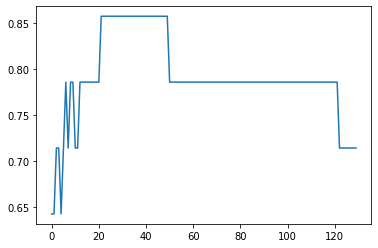

In [92]:
# plotted scores over the range of len of features for given dataset
 # and used this for picking value of K to get best possible metrics on test set. 


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
scores=[]
for i in range(1, len(features.columns)):
  
    scaler=MinMaxScaler()
    feature_filter=SelectKBest(f_classif, k=i)
    rf_clf=SVC(class_weight='balanced')
    pipe=make_pipeline(scaler, feature_filter, rf_clf)

    pipe.fit(X_train, y_train)
    y_pred_sl=pipe.predict(X_test)
    #print(classification_report(y_test, y_pred_sl))
    s=pipe.score(X_test, y_test)
    scores.append(s)
    
#mask=pipe[1].get_support()
#print(mask)
#print(mask.shape)

#feature_names=features.columns
#print(feature_names[mask])

#plt.plot(range(len(features.columns)), scores)
#plt.plot(range(20), scores)
plt.plot(scores)
plt.show()

In [93]:
#fitting svc with gridsearhCV with k=40 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
feature_filter=SelectKBest(f_classif, k=40)   
#scaler=StandardScaler()
scaler=MinMaxScaler()
#rf_clf=RandomForestClassifier()
svc=SVC(class_weight='balanced')
pipe=make_pipeline(scaler, feature_filter, svc)

stratified_kfold = RepeatedStratifiedKFold(n_splits=3,random_state=1)
    
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'roc_auc': make_scorer(roc_auc_score)}

param_range= [1.0, 2.0, 3.0]
param_grid=[{'svc__C': param_range, 'svc__kernel': ['linear']},{'svc__C': param_range,'svc__gamma':param_range, 'svc__kernel': ['rbf']}]
                
grid_search = GridSearchCV(estimator=pipe,param_grid=param_grid, scoring=scoring,cv=stratified_kfold,refit='f1')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(grid_search.best_params_)
print(f'f1 score: {cv_score}\nTest score: {test_score}')

# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))  


#balanced SVC doing the best 

{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
f1 score: 0.8000000000000002
Test score: 0.7142857142857143
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.00      0.00      0.00         3

    accuracy                           0.71        14
   macro avg       0.38      0.45      0.42        14
weighted avg       0.60      0.71      0.65        14



In [94]:
# can also try selectKbest with other models like random forest :

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
scores=[]
for i in range(1, len(features.columns)):
#for i in range(1, 20):    
    scaler=MinMaxScaler()
    feature_filter=SelectKBest(f_classif, k=i)
    rf_clf=RandomForestClassifier()
    pipe=make_pipeline(scaler, feature_filter, rf_clf)

    pipe.fit(X_train, y_train)
    y_pred_sl=pipe.predict(X_test)
    #print(classification_report(y_test, y_pred_sl))
    s=pipe.score(X_test, y_test)
    scores.append(s)
    
#mask=pipe[1].get_support()
#print(mask)
#print(mask.shape)

#feature_names=features.columns
#print(feature_names[mask])

#plt.plot(range(len(features.columns)), scores)
#plt.plot(range(20), scores)
plt.plot(scores)
plt.show()